In [1]:
import numpy as np
import pandas as pd

# Générer des données aléatoires pour deux classes décalées
np.random.seed(42)
n_samples = 100

# Classe 0
X0 = np.random.randn(n_samples, 2)
y0 = np.zeros(n_samples)

# Classe 1 (décalée de 2 sur chaque axe)
X1 = np.random.randn(n_samples, 2) +4
y1 = np.ones(n_samples) -2

# Combiner les deux classes
X = np.vstack((X0, X1))
y = np.concatenate((y0, y1))

# Créer le DataFrame
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

df.head()

,feature1,feature2,target
0,0.496714,-0.138264,0.0
1,0.647689,1.523030,0.0
2,-0.234153,-0.234137,0.0
3,1.579213,0.767435,0.0
4,-0.469474,0.542560,0.0


Text(0.5, 1.0, 'Données synthétiques pour classification binaire')

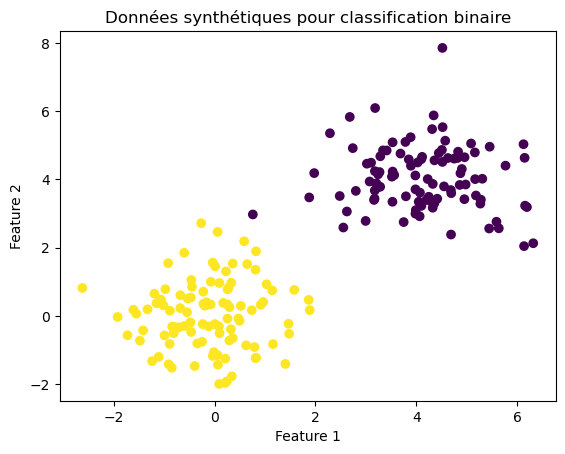

In [2]:
# plotter les données
import matplotlib.pyplot as plt
plt.scatter(df['feature1'], df['feature2'], c=df['target'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Données synthétiques pour classification binaire')

## 1. Utiliser un model avec ReLu

In [3]:
## 1. Utiliser un model avec ReLu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['feature1', 'feature2']], df['target'], test_size=0.2, random_state=42)
from sklearn.neural_network import MLPClassifier
model_relu = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, random_state=42)
model_relu.fit(X_train, y_train)
model_relu.score(X_test, y_test)


c:\Users\0000\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.975

c:\Users\0000\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Frontière de décision avec ReLU')

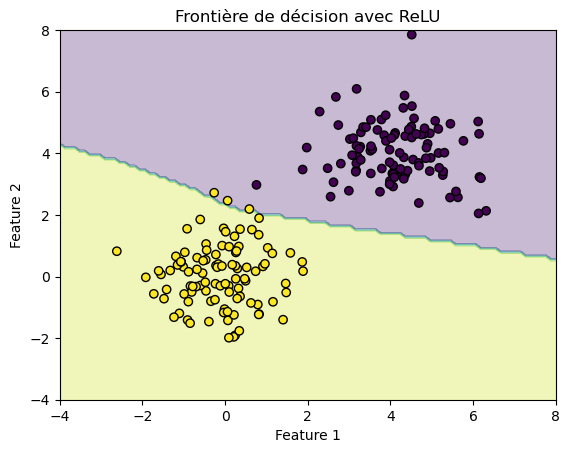

In [4]:
## Visyualiser la frontière de décision
import numpy as np
xx, yy = np.meshgrid(np.linspace(-4, 8, 100), np.linspace(-4, 8, 100))
Z = model_relu.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(df['feature1'], df['feature2'], c=df['target'], cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontière de décision avec ReLU')


## 2. Utiliser Sigmoid

In [5]:
model_sigmoid = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', max_iter=1000, random_state=42)
model_sigmoid.fit(X_train, y_train)
model_sigmoid.score(X_test, y_test)

c:\Users\0000\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.95

c:\Users\0000\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Frontière de décision avec Sigmoid')

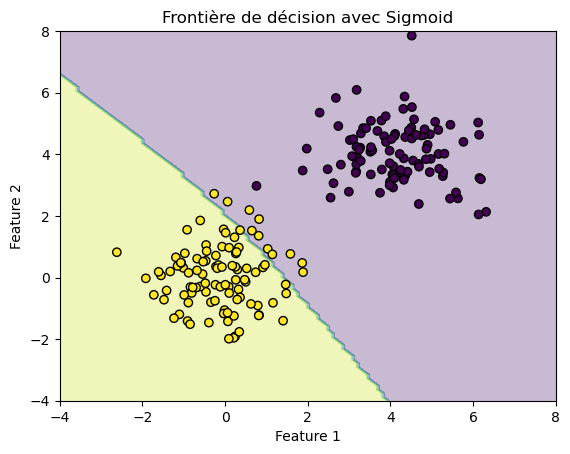

In [6]:
## Visyualiser la frontière de décision
import numpy as np
xx, yy = np.meshgrid(np.linspace(-4, 8, 100), np.linspace(-4, 8, 100))
Z = model_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(df['feature1'], df['feature2'], c=df['target'], cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontière de décision avec Sigmoid')


# Dataset avec make_moons

## 1. Utiliser ReLU

dimensions de X: (2, 500)
dimensions de y: (1, 500)


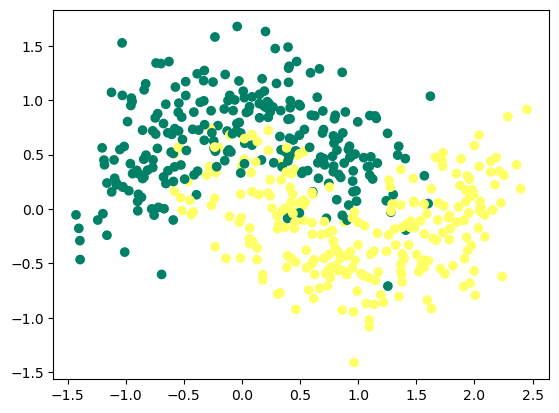

In [7]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.3,random_state=0)
X = X.T # Attention il faut transposer le le vecteur X pour en faire (2,n)
y = y.reshape((1, y.shape[0])) # Il faut reshape le y pour eviter (,n),il faut lui donner une ligne sinon par defaut ya rien

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()


In [8]:
## 1. Utiliser un model avec ReLu
# Transposer X pour obtenir (n_samples, n_features)
X_moons = X.T
y_moons = y.flatten()

# Séparer en train/test
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# Entraîner le modèle MLPClassifier avec ReLU
model_moons_relu = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, random_state=42)
model_moons_relu.fit(X_train_moons, y_train_moons)

# Afficher la précision sur le test
print("Score test:", model_moons_relu.score(X_test_moons, y_test_moons))

Score test: 0.89


Text(0.5, 1.0, 'Frontière de décision avec ReLU sur make_moons')

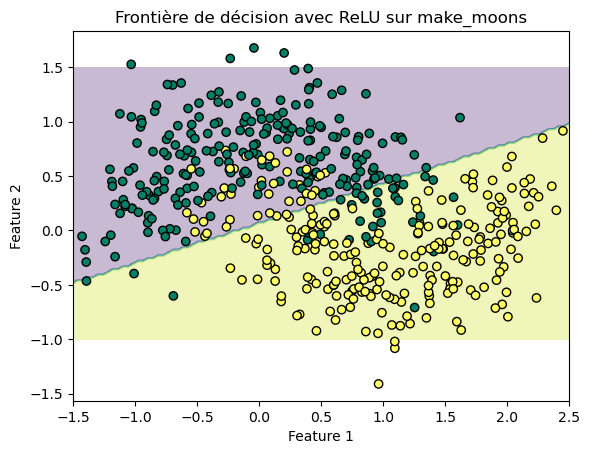

In [9]:
# visualiser la frontière de décision
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1, 1.5, 100))
Z = model_moons_relu.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[0, :], X[1, :], c=y, cmap='summer', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontière de décision avec ReLU sur make_moons')


## 2. Utiliser sigmoid

In [10]:
# Entraîner le modèle MLPClassifier avec ReLU
model_moons_sigmoid = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', max_iter=1000, random_state=42)
model_moons_sigmoid.fit(X_train_moons, y_train_moons)

# Afficher la précision sur le test
print("Score test:", model_moons_sigmoid.score(X_test_moons, y_test_moons))

Score test: 0.86


Text(0.5, 1.0, 'Frontière de décision avec Sigmoid sur make_moons')

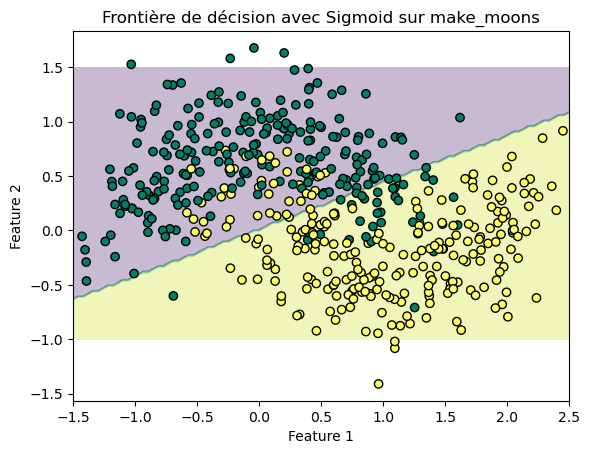

In [11]:
# visualiser la frontière de décision
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1, 1.5, 100))
Z = model_moons_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[0, :], X[1, :], c=y, cmap='summer', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontière de décision avec Sigmoid sur make_moons')

## 3. utiliser ANNs

In [14]:
## Entainer un modele avec keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model_keras = keras.Sequential([
    keras.Input(shape=(2,)),            # 2 features (X1, X2)
    layers.Dense(32, activation='relu'),# 1ère couche cachée
    layers.Dense(32, activation='relu'),# 2ème couche cachée
    layers.Dense(1, activation='sigmoid') # Sortie binaire
])  
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_keras.fit(X_train_moons, y_train_moons, epochs=100, batch_size=10, verbose=0)
loss, accuracy = model_keras.evaluate(X_test_moons, y_test_moons, verbose=0)
print("Score test keras:", accuracy)    



Score test keras: 0.8999999761581421


In [16]:
model_keras.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,557 (13.90 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,372 (9.27 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


Text(0.5, 1.0, 'Frontière de décision avec Keras sur make_moons')

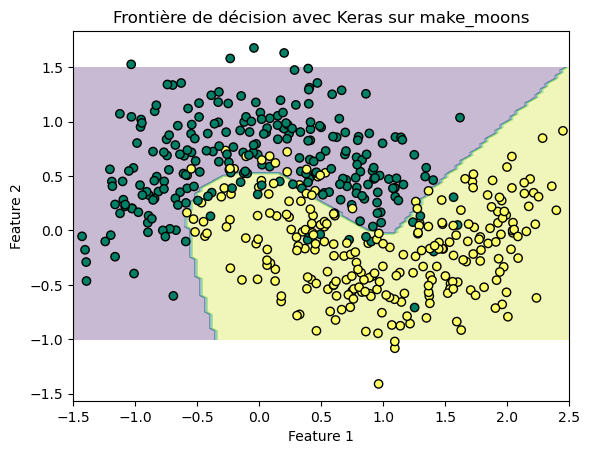

In [15]:
# visualiser la frontière de décision
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1, 1.5, 100))
Z = model_keras.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)  # Convertir les probabilités en classes
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[0, :], X[1, :], c=y, cmap='summer', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontière de décision avec Keras sur make_moons')
